<a href="https://colab.research.google.com/github/Sparrow0hawk/covid_stuff/blob/master/notebooks/covid_transport_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating available COVID-19 UK Data

Using: 
- [Mobility data from Apple](https://github.com/ActiveConclusion/COVID19_mobility/blob/master/apple_reports/applemobilitytrends.csv)

- [Collated COVID-19 UK data](https://github.com/tomwhite/covid-19-uk-data)

Ideas:

- [ ] Align case data to mobility data
- [ ] Get police data and map to mobility data
- [ ] More generally explore crime data (probably in Leeds/West Yorks.)


In [1]:
# install jupyterlab plotly extension, output is hidden
! jupyter labextension install jupyterlab-plotly@4.8.2

Building jupyterlab assets (build:prod:minimize)


In [1]:
# download apple mobility dataset 
! curl -O https://raw.githubusercontent.com/ActiveConclusion/COVID19_mobility/master/apple_reports/applemobilitytrends.csv

# download collated UK covid data (daily case data)
! curl -O https://raw.githubusercontent.com/tomwhite/covid-19-uk-data/master/data/covid-19-cases-uk.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3929k  100 3929k    0     0  3867k      0  0:00:01  0:00:01 --:--:-- 3867k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  783k  100  783k    0     0   668k      0  0:00:01  0:00:01 --:--:--  668k


In [3]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# load mobility dataset and check head
mob_dataset = pd.read_csv('applemobilitytrends.csv')

mob_dataset.head()

geo_type     region transportation_type alternative_name sub-region  \
0  country/region    Albania             driving              NaN        NaN   
1  country/region    Albania             walking              NaN        NaN   
2  country/region  Argentina             driving              NaN        NaN   
3  country/region  Argentina             walking              NaN        NaN   
4  country/region  Australia             driving               AU        NaN   

  country  2020-01-13  2020-01-14  2020-01-15  2020-01-16  ...  2020-06-18  \
0     NaN       100.0       95.30      101.43       97.20  ...       99.95   
1     NaN       100.0      100.68       98.93       98.46  ...       94.63   
2     NaN       100.0       97.07      102.45      111.21  ...       50.71   
3     NaN       100.0       95.11      101.37      112.67  ...       37.47   
4     NaN       100.0      102.98      104.21      108.63  ...      103.06   

   2020-06-19  2020-06-20  2020-06-21  2020-06-22  2020-06-23  2020-06-24  \
0      119.85      136.26      128.16      109.24      105.57      113.27   
1       96.59       97.74       84.18       96.67       97.83      103.88   
2       60.57       57.48       32.01       42.79       46.38       48.12   
3       42.79       40.95       24.00       31.28       33.56       34.09   
4      106.05       85.04       88.15       91.10       94.49       97.77   

   2020-06-25  2020-06-26  2020-06-27  
0      115.80      133.38      155.72  
1      105.03      113.26      107.46  
2       50.61       57.83       53.58  
3       36.12       40.08       36.86  
4      106.30      109.75       90.76  

[5 rows x 173 columns]

In [5]:
# load daily case dataset and check head
daycase_dat = pd.read_csv('covid-19-cases-uk.csv')

daycase_dat.head()

Date  Country   AreaCode           Area  TotalCases
0  2020-01-30  England  E06000014           York         1.0
1  2020-02-03  England  E10000008          Devon         2.0
2  2020-02-03  England  E10000015  Hertfordshire         1.0
3  2020-02-03  England  E10000016           Kent         1.0
4  2020-02-03  England  E08000016       Barnsley         1.0

Text(0.5, 1.0, 'Proportion of NA data')

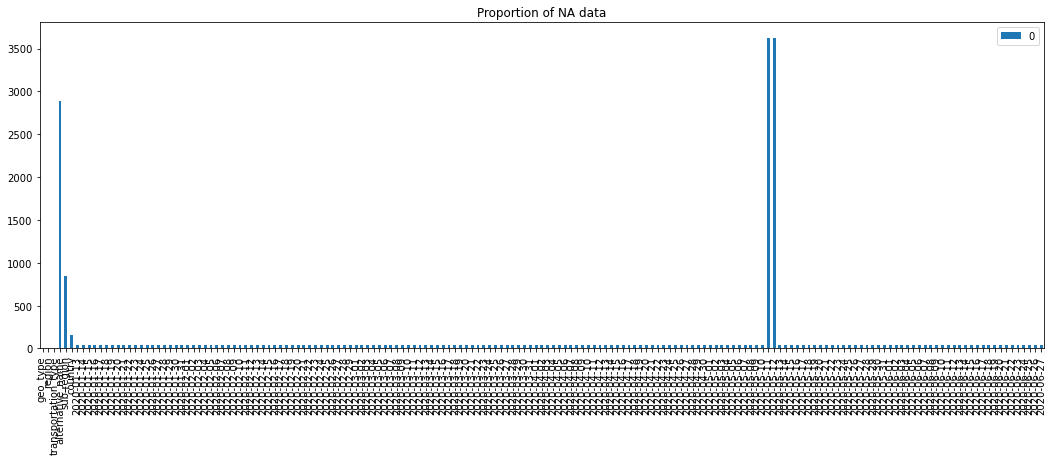

In [6]:
# see how much NA data in mobility dataset there is
pd.DataFrame(mob_dataset.isna().sum()).plot.bar(figsize=(18,6))

plt.title('Proportion of NA data')

Text(0.5, 1.0, 'Proportion of NA data')

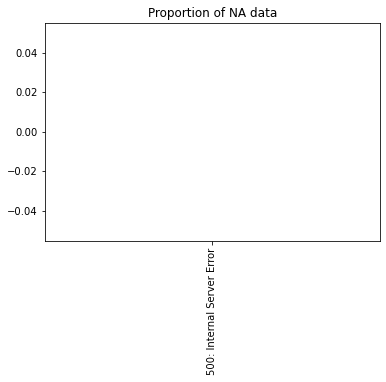

In [7]:
# see how much NA data in mobility dataset there is
daycase_dat.isna().sum().plot.bar()

plt.title('Proportion of NA data')

## Exploring Mobility dataset

In [8]:
UK_dat = mob_dataset[mob_dataset.country == "United Kingdom"]

UK_dat.head()

geo_type      region transportation_type alternative_name  \
218     city     Belfast             driving              NaN   
219     city     Belfast             transit              NaN   
220     city     Belfast             walking              NaN   
234     city  Birmingham             driving              NaN   
235     city  Birmingham             transit              NaN   

           sub-region         country  2020-01-13  2020-01-14  2020-01-15  \
218  Northern Ireland  United Kingdom       100.0      108.49      111.95   
219  Northern Ireland  United Kingdom       100.0      100.20      103.68   
220  Northern Ireland  United Kingdom       100.0      116.70      123.20   
234           England  United Kingdom       100.0      104.03      102.98   
235           England  United Kingdom       100.0      102.32      103.58   

     2020-01-16  ...  2020-06-18  2020-06-19  2020-06-20  2020-06-21  \
218      124.10  ...       91.51      100.90      101.31       68.40   
219      118.45  ...       31.35       32.29       32.89       28.28   
220      127.89  ...       64.86       72.60       76.06       44.21   
234      103.80  ...       79.40       87.23       86.53       71.50   
235      100.84  ...       41.32       42.88       39.32       35.84   

     2020-06-22  2020-06-23  2020-06-24  2020-06-25  2020-06-26  2020-06-27  
218       88.22       92.40      101.75      102.63      110.62      100.04  
219       37.77       38.57       41.38       43.32       31.02       31.08  
220       66.23       68.76       75.64       73.34       83.16       76.77  
234       85.26       89.11       92.19       93.81      100.07       87.74  
235       48.18       50.92       52.72       53.58       48.06       41.74  

[5 rows x 173 columns]

In [9]:
UK_dat.columns

Index(['geo_type', 'region', 'transportation_type', 'alternative_name',
       'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16',
       ...
       '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22',
       '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27'],
      dtype='object', length=173)

In [10]:
UK_dat.shape

(55, 173)

In [11]:
UK_dat.region.unique()

array(['Belfast', 'Birmingham', 'Bradford', 'Bristol', 'Cardiff',
       'Edinburgh', 'Glasgow', 'Leeds', 'Liverpool', 'London',
       'Manchester', 'Newcastle upon Tyne', 'Nottingham', 'Portsmouth',
       'Reading', 'Sheffield', 'Bailiwick of Guernsey',
       'Bailiwick of Jersey', 'England', 'Isle of Man',
       'Northern Ireland', 'Scotland', 'Wales'], dtype=object)

In [12]:
points_of_int = ['Belfast', 'Birmingham', 'Bradford', 'Bristol', 'Cardiff',
       'Edinburgh', 'Glasgow', 'Leeds', 'Liverpool', 'London',
       'Manchester', 'Newcastle upon Tyne', 'Nottingham', 'Portsmouth',
       'Reading', 'Sheffield']

print(len(points_of_int))

16


In [13]:
UK_dat_working = UK_dat.copy()

UK_dat_working = UK_dat_working.drop(['geo_type', 'alternative_name','sub-region', 'country'], axis=1)

In [14]:
UK_dat_working.head()

region transportation_type  2020-01-13  2020-01-14  2020-01-15  \
218     Belfast             driving       100.0      108.49      111.95   
219     Belfast             transit       100.0      100.20      103.68   
220     Belfast             walking       100.0      116.70      123.20   
234  Birmingham             driving       100.0      104.03      102.98   
235  Birmingham             transit       100.0      102.32      103.58   

     2020-01-16  2020-01-17  2020-01-18  2020-01-19  2020-01-20  ...  \
218      124.10      125.70      121.01       81.15      105.81  ...   
219      118.45      113.70      104.21       92.71      103.94  ...   
220      127.89      147.78      179.12       93.03      121.72  ...   
234      103.80      105.29      102.57       85.85      104.19  ...   
235      100.84       97.53       87.24       83.08      102.35  ...   

     2020-06-18  2020-06-19  2020-06-20  2020-06-21  2020-06-22  2020-06-23  \
218       91.51      100.90      101.31       68.40       88.22       92.40   
219       31.35       32.29       32.89       28.28       37.77       38.57   
220       64.86       72.60       76.06       44.21       66.23       68.76   
234       79.40       87.23       86.53       71.50       85.26       89.11   
235       41.32       42.88       39.32       35.84       48.18       50.92   

     2020-06-24  2020-06-25  2020-06-26  2020-06-27  
218      101.75      102.63      110.62      100.04  
219       41.38       43.32       31.02       31.08  
220       75.64       73.34       83.16       76.77  
234       92.19       93.81      100.07       87.74  
235       52.72       53.58       48.06       41.74  

[5 rows x 169 columns]

In [15]:
UK_dat_working.set_index('transportation_type').iloc[:3,1:].T

transportation_type  driving  transit  walking
2020-01-13            100.00   100.00   100.00
2020-01-14            108.49   100.20   116.70
2020-01-15            111.95   103.68   123.20
2020-01-16            124.10   118.45   127.89
2020-01-17            125.70   113.70   147.78
...                      ...      ...      ...
2020-06-23             92.40    38.57    68.76
2020-06-24            101.75    41.38    75.64
2020-06-25            102.63    43.32    73.34
2020-06-26            110.62    31.02    83.16
2020-06-27            100.04    31.08    76.77

[167 rows x 3 columns]

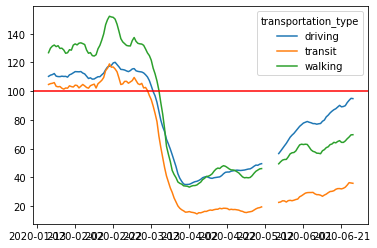

In [16]:
UK_dat_working.set_index('transportation_type').iloc[:3,1:].T.rolling(7).mean().plot()

plt.axhline(100, color='r')

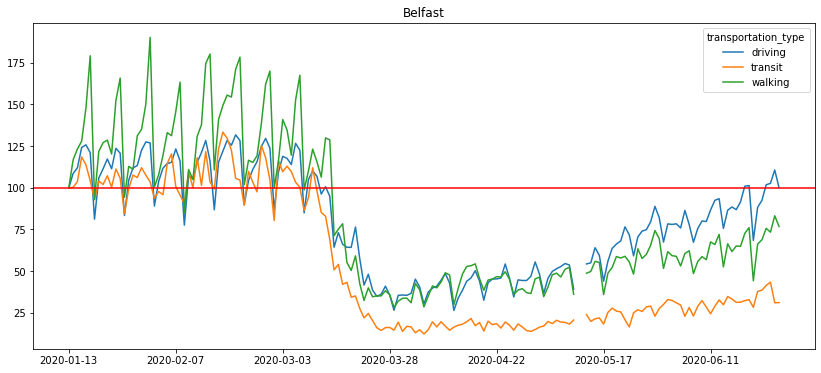

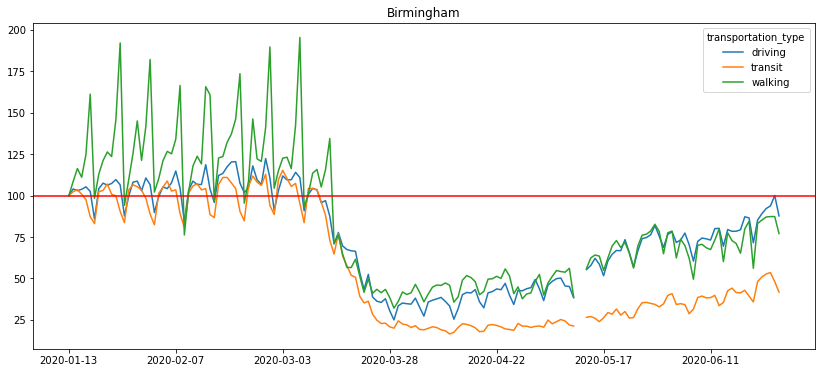

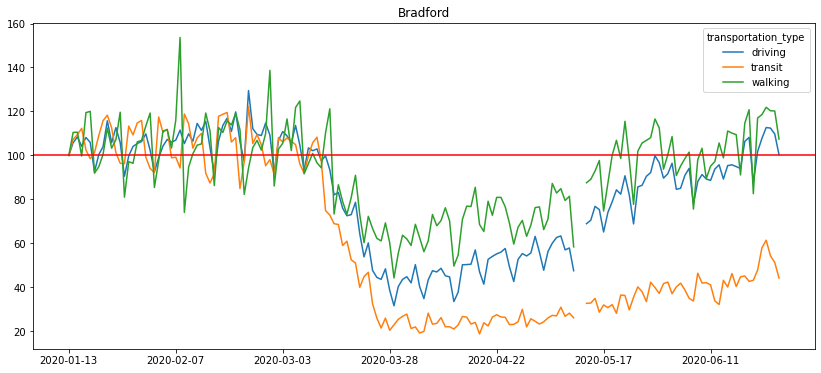

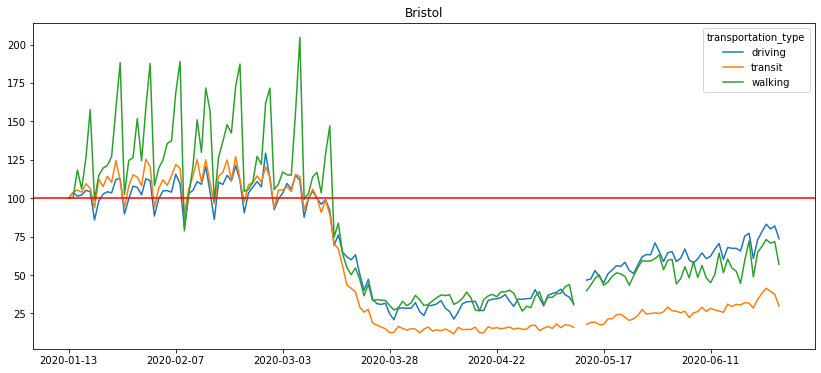

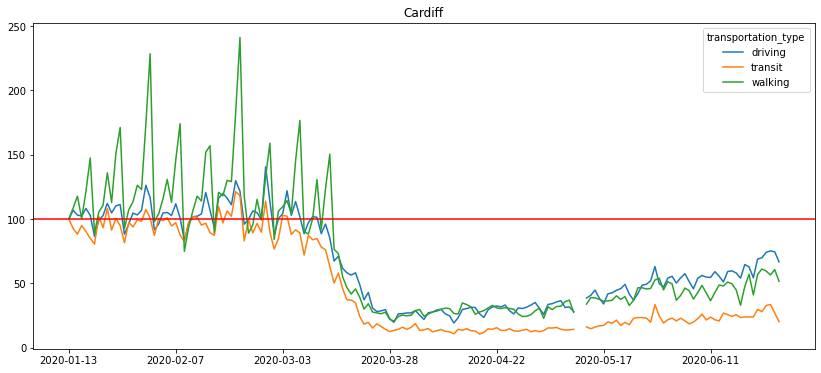

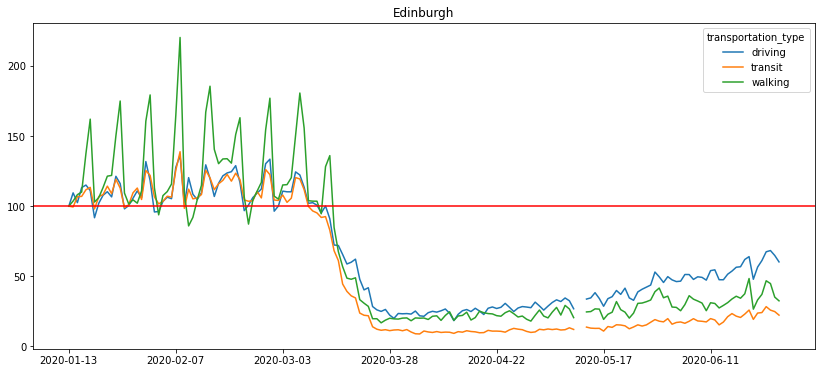

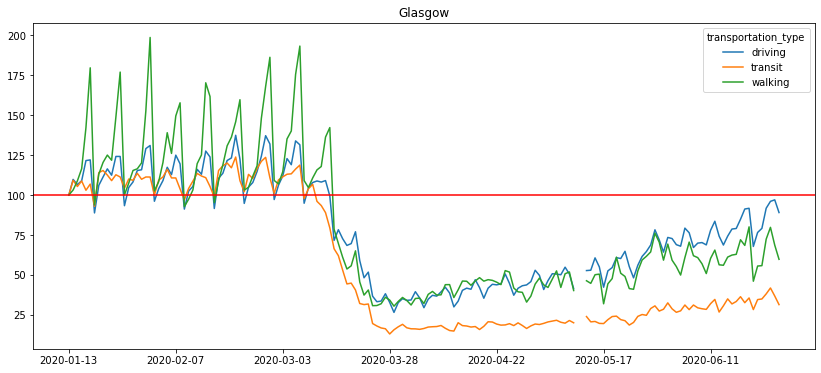

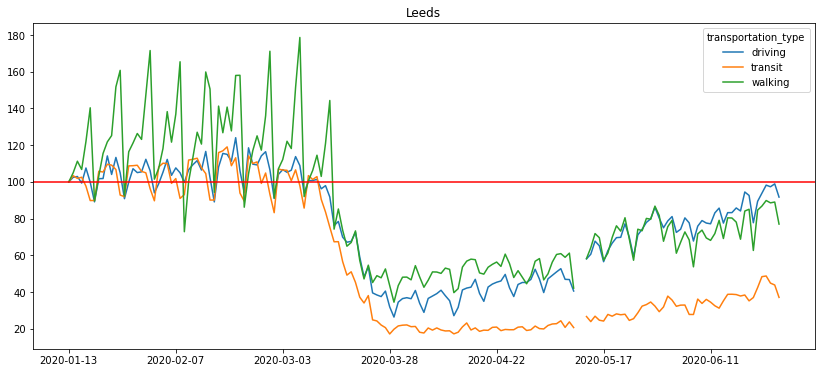

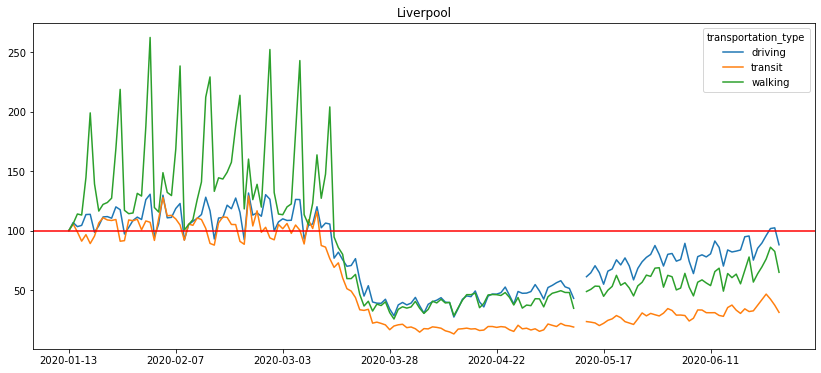

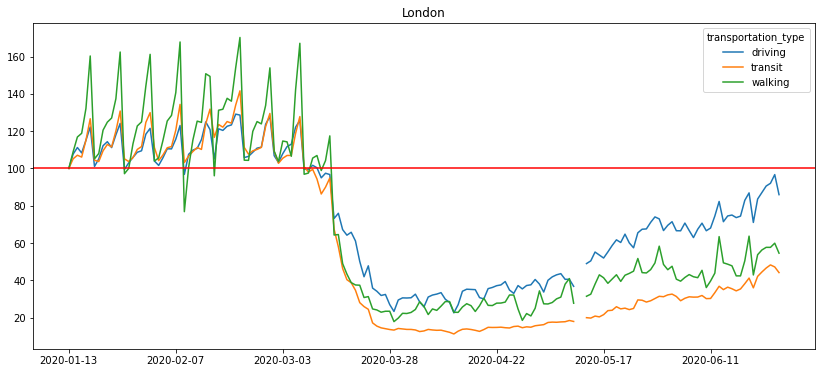

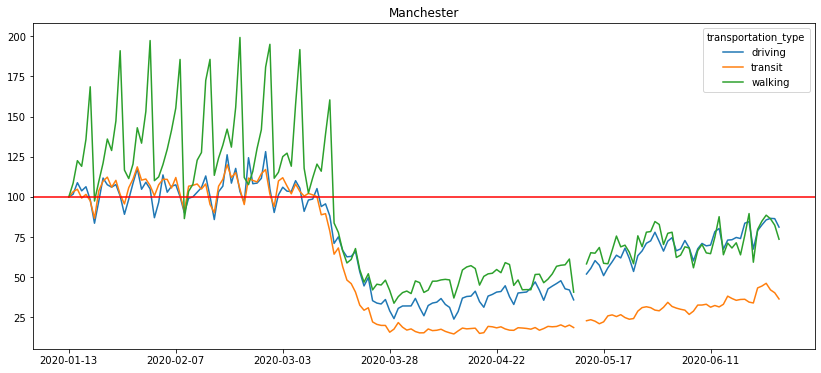

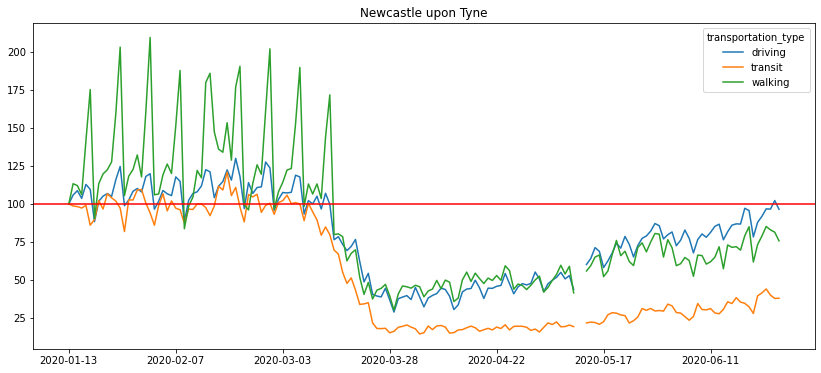

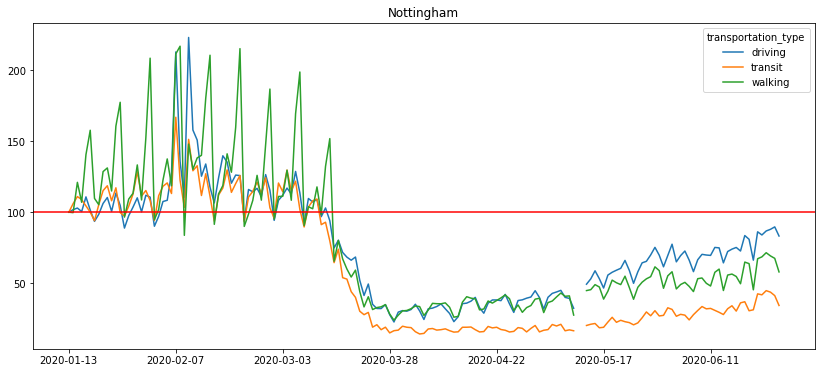

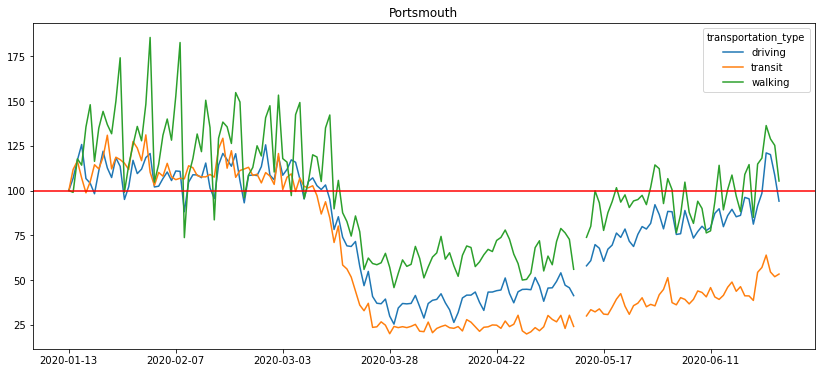

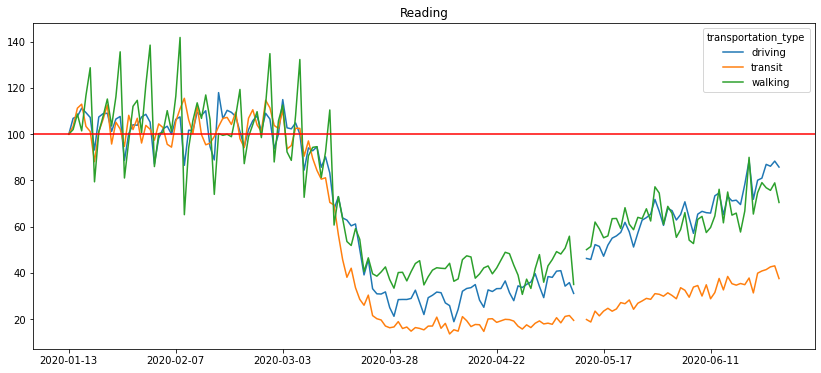

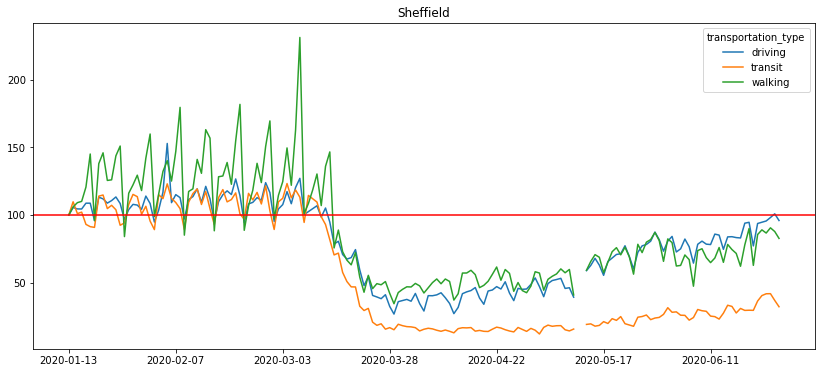

In [17]:
for city in points_of_int:
  working_frame = UK_dat_working[UK_dat_working.region == city].copy()

  working_frame.drop(['region'], axis=1, inplace=True)

  working_frame.set_index('transportation_type').T.plot(figsize=(14,6))

  plt.axhline(100, color='r')

  plt.title(city)

  plt.figure()

  plt.close()

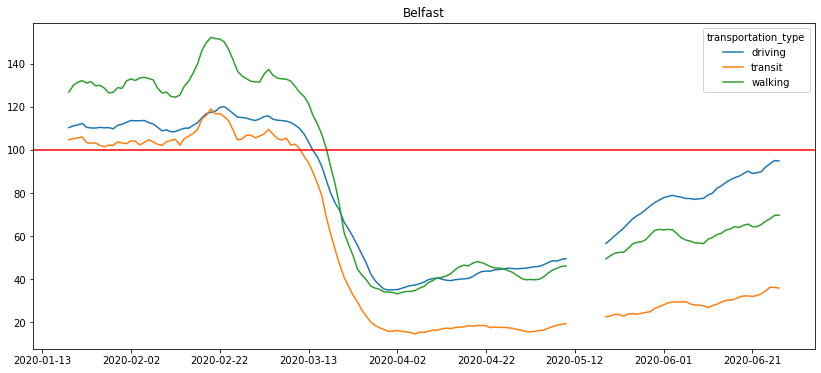

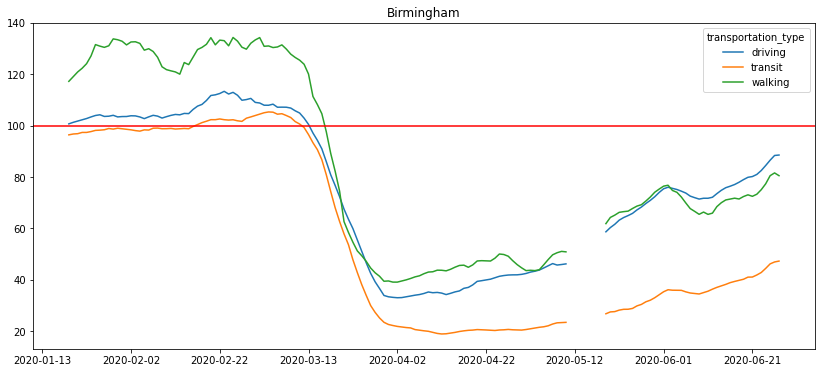

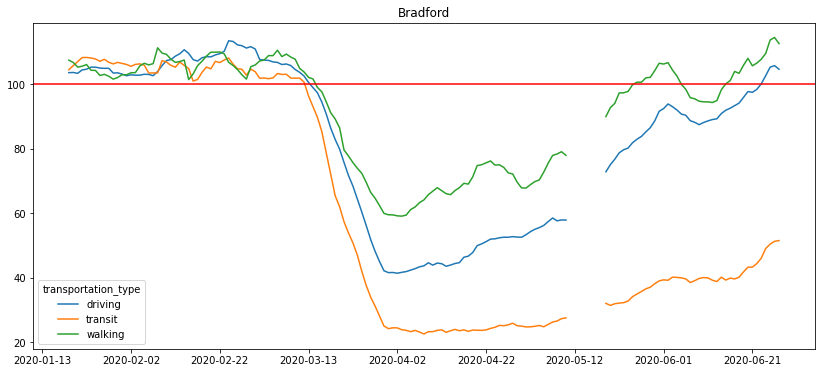

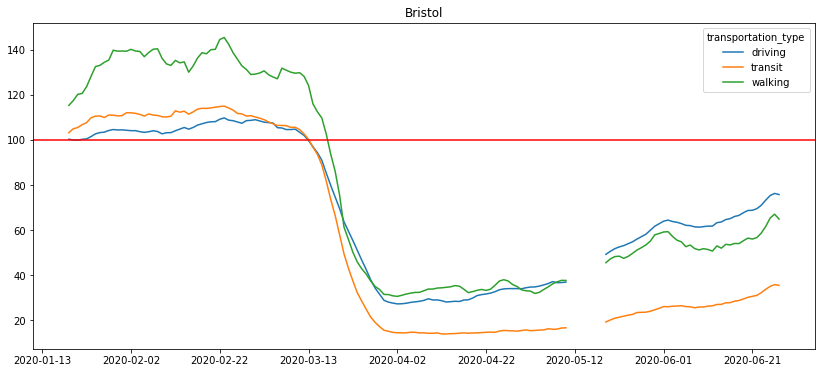

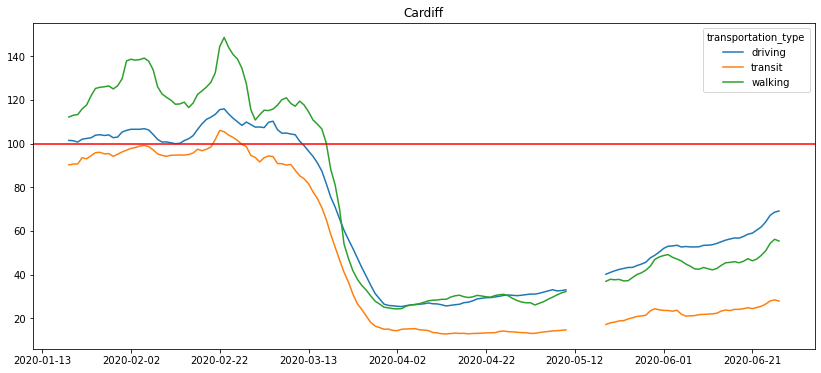

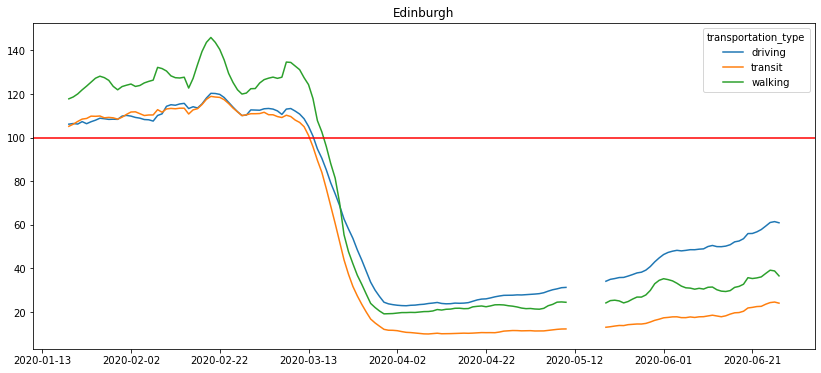

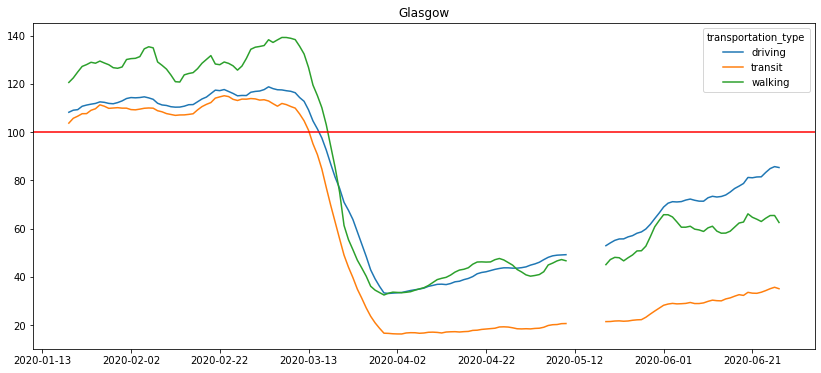

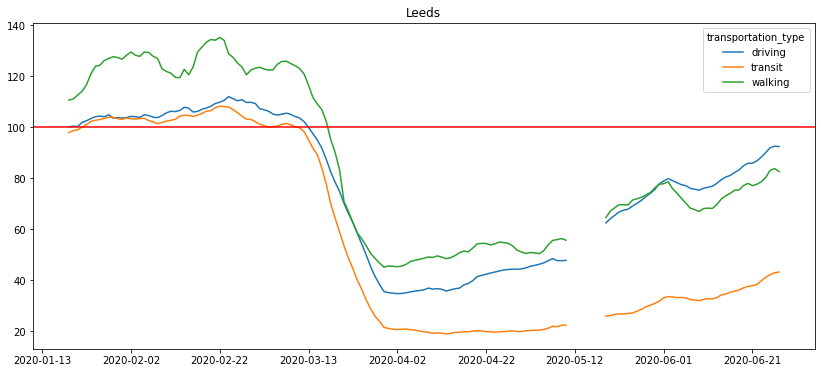

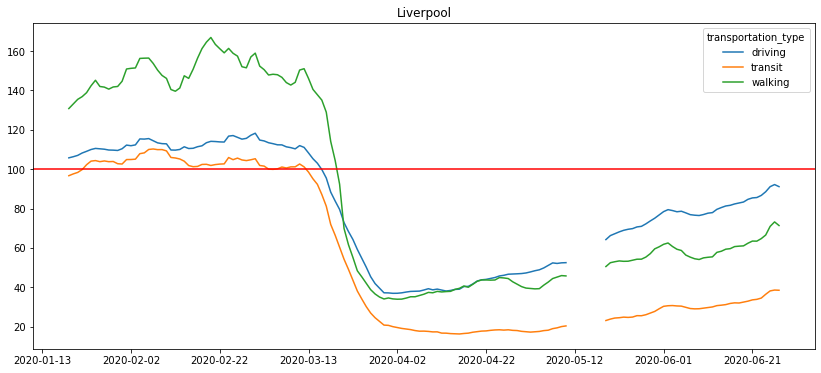

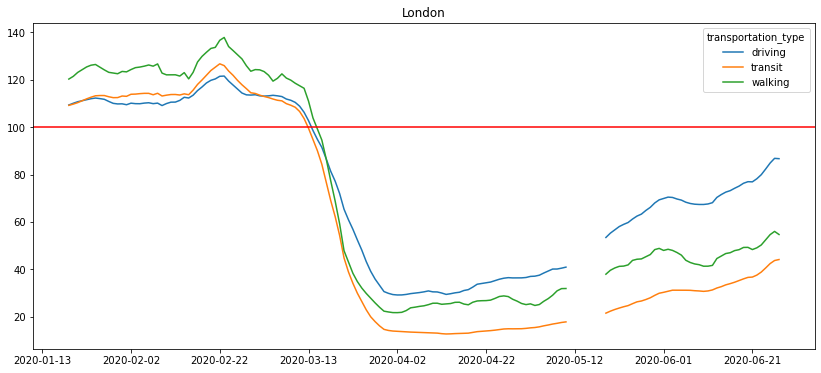

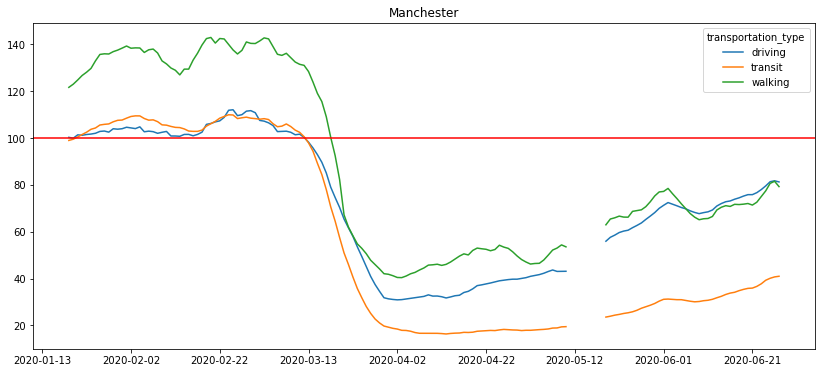

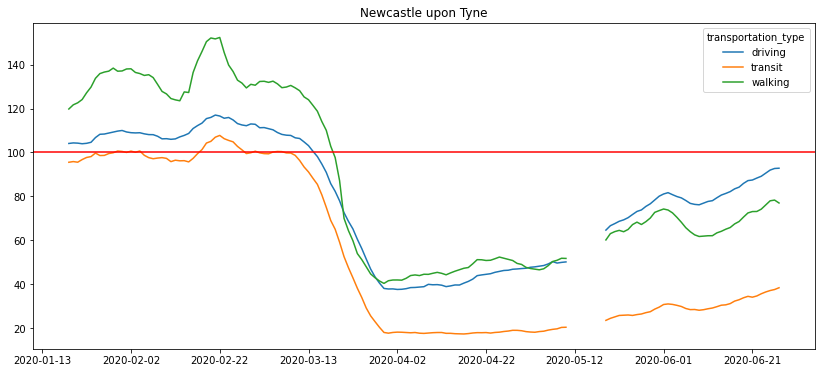

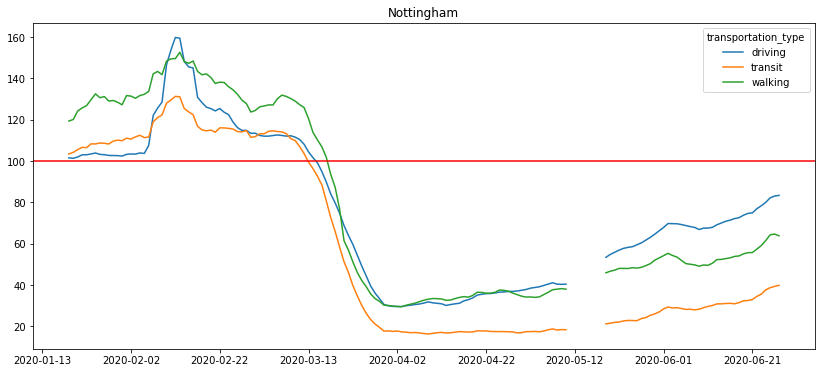

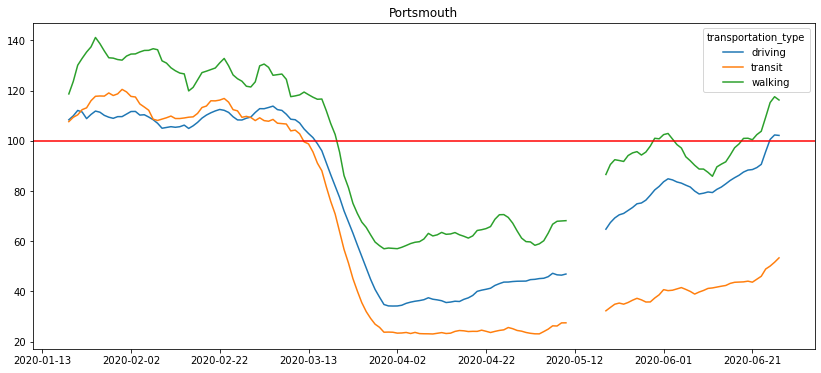

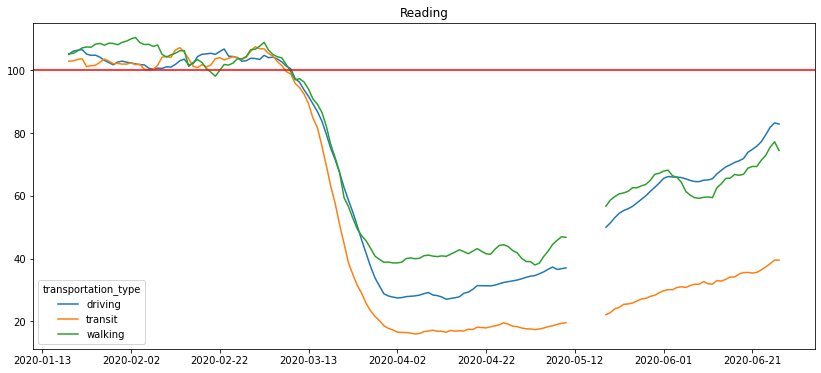

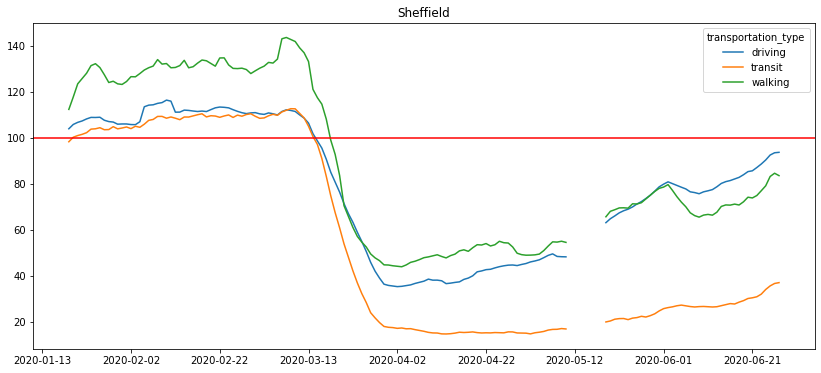

In [18]:
for city in points_of_int:
  working_frame = UK_dat_working[UK_dat_working.region == city].copy()

  working_frame.drop(['region'], axis=1, inplace=True)

  working_frame.set_index('transportation_type').T.rolling(7).mean().plot(figsize=(14,6))

  plt.axhline(100, color='r')

  plt.title(city)

  plt.figure()

  plt.close()

## Exploring Daily cases dataset

In [19]:
daycase_dat_noNA = daycase_dat.dropna(subset=['AreaCode'])

In [20]:
daycase_dat_noNA.tail()

Date   Country   AreaCode           Area  TotalCases
17593  2020-06-28  Scotland  S08000024        Lothian      3151.0
17594  2020-06-28  Scotland  S08000025         Orkney         9.0
17595  2020-06-28  Scotland  S08000026       Shetland        54.0
17596  2020-06-28  Scotland  S08000030        Tayside      1768.0
17597  2020-06-28  Scotland  S08000028  Western Isles         7.0

In [21]:
# a west yorkshire plus some extra list of local authorities to inspect
west_yorks_extra = ['Leeds','Wakefield','Sheffield',
                                             'Doncaster','Calderdale','Barnsley',
                                             'Bradford','Kirklees']

In [22]:
daycase_dat_noNA.columns

Index(['Date', 'Country', 'AreaCode', 'Area', 'TotalCases'], dtype='object')

In [23]:
WYextra = daycase_dat_noNA[daycase_dat_noNA.Area.isin(west_yorks_extra)]

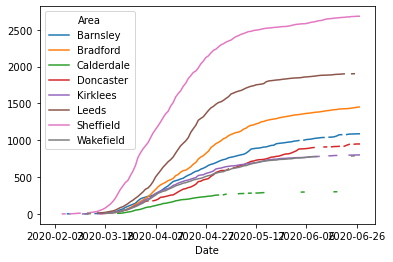

In [24]:
WYextra.pivot(index='Date',columns='Area', values='TotalCases').plot()

In [25]:
WYextra.tail(9)

Date  Country   AreaCode        Area  TotalCases
17366  2020-06-26  England  E08000019   Sheffield      2683.0
17408  2020-06-27  England  E08000035       Leeds      1903.0
17451  2020-06-27  England  E08000034    Kirklees       801.0
17472  2020-06-27  England  E08000032    Bradford      1452.0
17479  2020-06-27  England  E08000017   Doncaster       950.0
17507  2020-06-27  England  E08000016    Barnsley      1088.0
17510  2020-06-27  England  E08000033  Calderdale       303.0
17530  2020-06-27  England  E08000019   Sheffield      2683.0
17539  2020-06-27  England  E08000036   Wakefield       790.0

In [26]:
WYextra.pivot(index='Date',columns='Area', values='TotalCases')

Area        Barnsley  Bradford  Calderdale  Doncaster  Kirklees   Leeds  \
Date                                                                      
2020-02-03       1.0       NaN         NaN        NaN       NaN     NaN   
2020-02-20       NaN       1.0         NaN        NaN       NaN     NaN   
2020-02-28       NaN       NaN         NaN        NaN       NaN     1.0   
2020-02-29       NaN       NaN         NaN        NaN       NaN     NaN   
2020-03-01       NaN       2.0         NaN        NaN       NaN     2.0   
...              ...       ...         ...        ...       ...     ...   
2020-06-23    1084.0    1432.0       303.0      945.0     798.0     NaN   
2020-06-24    1085.0    1437.0         NaN        NaN     799.0  1902.0   
2020-06-25    1086.0    1442.0         NaN      947.0     800.0  1903.0   
2020-06-26    1088.0    1448.0         NaN      950.0     801.0     NaN   
2020-06-27    1088.0    1452.0       303.0      950.0     801.0  1903.0   

Area        Sheffield  Wakefield  
Date                              
2020-02-03        NaN        NaN  
2020-02-20        NaN        NaN  
2020-02-28        NaN        NaN  
2020-02-29        1.0        NaN  
2020-03-01        2.0        NaN  
...               ...        ...  
2020-06-23     2674.0        NaN  
2020-06-24     2679.0      786.0  
2020-06-25     2680.0      790.0  
2020-06-26     2683.0        NaN  
2020-06-27     2683.0      790.0  

[122 rows x 8 columns]

In [27]:
# make some interactive plots with plotly
import plotly.express as px

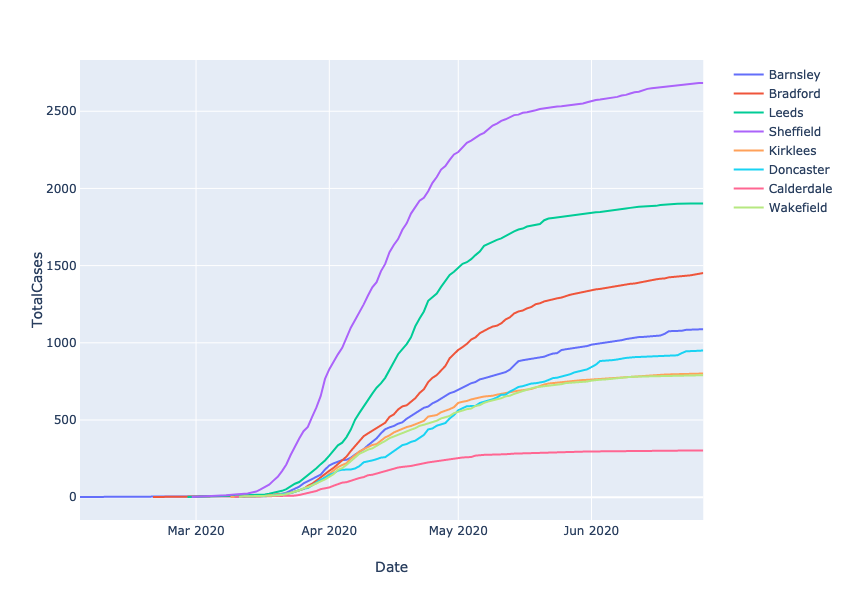

In [28]:
fig = px.line(data_frame = WYextra, 
        x="Date", y="TotalCases", color='Area')

# remove annoying Area= on legend
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()

In [29]:
daily_diff = WYextra.pivot(index='Date',columns='Area', values='TotalCases') \
  .diff().reset_index().melt(id_vars='Date')

daily_diff.head()

Date      Area  value
0  2020-02-03  Barnsley    NaN
1  2020-02-20  Barnsley    NaN
2  2020-02-28  Barnsley    NaN
3  2020-02-29  Barnsley    NaN
4  2020-03-01  Barnsley    NaN

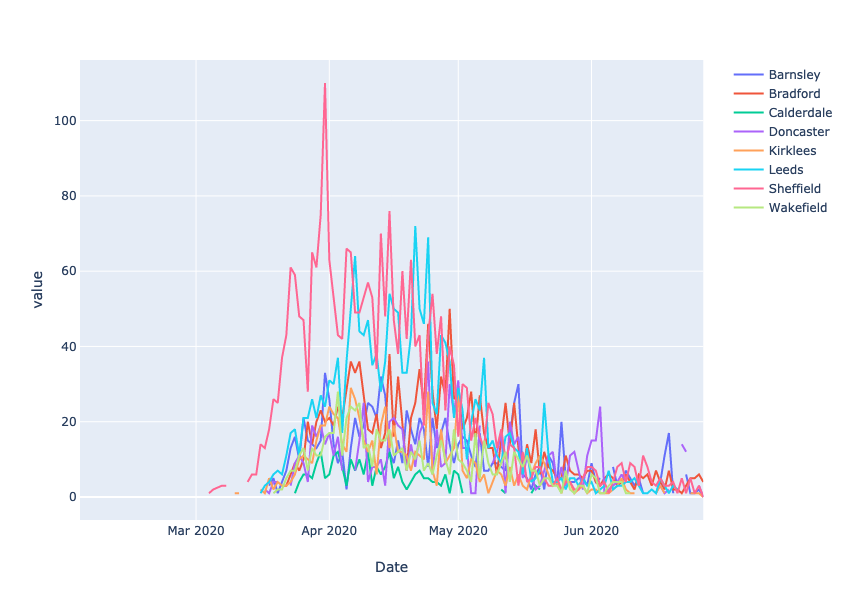

In [30]:
fig = px.line(data_frame = daily_diff, 
        x="Date", y="value", color='Area')

# remove annoying Area= on legend
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()

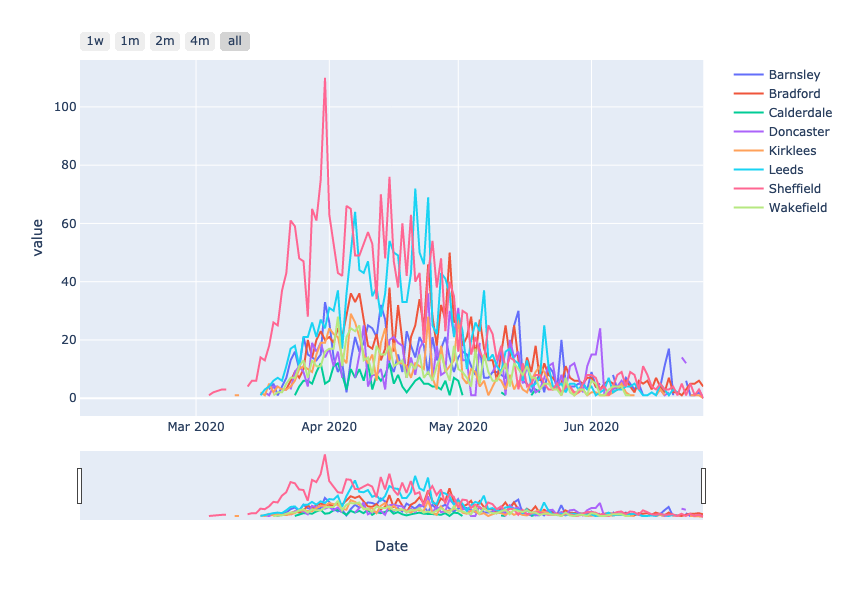

In [31]:
# figure widget 
# adjustable date axis
import plotly.graph_objects as go

fig = px.line(data_frame = daily_diff, 
        x="Date", y="value", color='Area')

# remove annoying Area= on legend
for trace in fig.data:
    trace.name = trace.name.split('=')[1]

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=2, label="2m", step="month", stepmode="todate"),
            dict(count=4, label="4m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

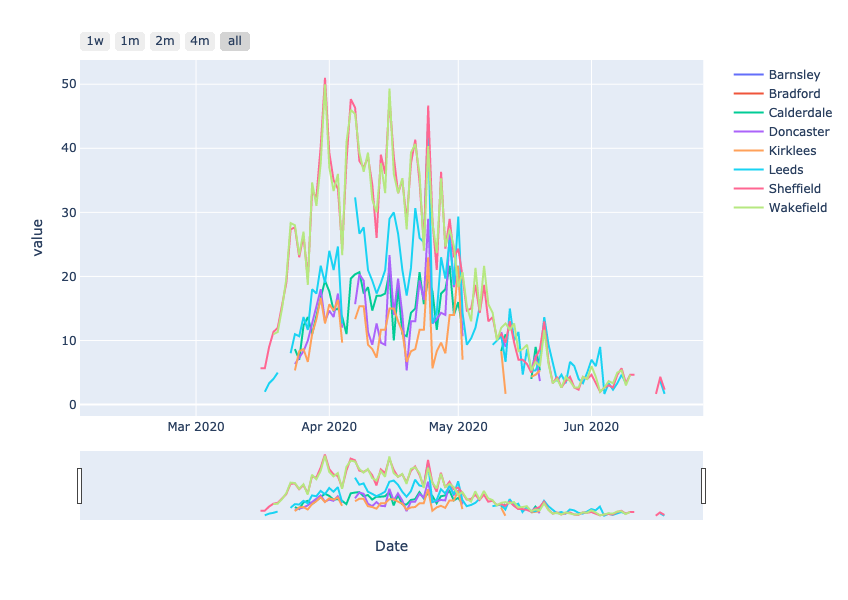

In [32]:
# figure widget 
# adjustable date axis
import plotly.graph_objects as go

# plotting 3 day rolling avg
fig = px.line(data_frame = WYextra.pivot(index='Date',columns='Area', values='TotalCases') \
  .diff().rolling(3, axis=1).mean().reset_index().melt(id_vars='Date'), 
        x="Date", y="value", color='Area')

# remove annoying Area= on legend
for trace in fig.data:
    trace.name = trace.name.split('=')[1]

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=2, label="2m", step="month", stepmode="todate"),
            dict(count=4, label="4m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()